In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
 Dense,
 Conv2D,
 LeakyReLU,
 MaxPool2D,
 Flatten,
 Dropout,
 BatchNormalization,
 Lambda
)
from keras.optimizers import Adam,SGD
from tensorflow.keras import regularizers
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds_train, info_train = tfds.load('stl10', split='train', with_info=True, shuffle_files=True, as_supervised=True)
df_train = tfds.as_dataframe(ds_train.take(5), info_train)
df_train.head()

image  label
0  [[[136, 144, 153], [125, 127, 136], [125, 126,...      1
1  [[[70, 132, 186], [81, 139, 189], [143, 176, 2...      0
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      8
3  [[[104, 90, 69], [101, 87, 66], [103, 88, 67],...      3
4  [[[169, 186, 206], [169, 185, 208], [169, 185,...      8

In [ ]:
ds_test, info_test = tfds.load('stl10', split='test', with_info=True, shuffle_files=True, as_supervised=True)
df_test = tfds.as_dataframe(ds_test.take(5), info_test)
df_test.head()

image  label
0  [[[140, 174, 166], [136, 170, 165], [133, 170,...      6
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      0
3  [[[171, 183, 180], [173, 184, 181], [174, 185,...      8
4  [[[86, 74, 61], [114, 106, 92], [129, 119, 96]...      7

In [ ]:
ds_unlabelled, info_unlabelled = tfds.load('stl10', split='unlabelled', with_info=True, shuffle_files=True, as_supervised=True)
df_unlabelled = tfds.as_dataframe(ds_unlabelled.take(5), info_unlabelled)
df_unlabelled.head()

image  label
0  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     -1
1  [[[125, 109, 94], [124, 108, 94], [124, 108, 9...     -1
2  [[[89, 140, 211], [89, 140, 211], [85, 141, 21...     -1
3  [[[117, 136, 160], [117, 137, 162], [117, 138,...     -1
4  [[[252, 240, 205], [252, 233, 191], [251, 218,...     -1

In [ ]:
x_train=[]
y_train=[]

In [ ]:
for data in ds_train:
  x,y = data
  x=x.numpy()
  y=y.numpy()
  x_train.append(x)
  y_train.append(y)

In [ ]:
x_train = np.array(x_train)

In [ ]:
y_train = np.array(y_train)

In [ ]:
x_train.shape

(5000, 96, 96, 3)

In [ ]:
y_train = pd.get_dummies(y_train)
#one hot encoding

In [ ]:
y_train.shape

(5000, 10)

In [ ]:
x_test=[]
y_test=[]

for data in ds_test:
  x,y = data
  x=x.numpy()
  y=y.numpy()
  x_test.append(x)
  y_test.append(y)

x_test = np.array(x_test)
y_test = np.array(y_test)

y_test = pd.get_dummies(y_test)
#one hot encoding

In [ ]:
x_test.shape

(8000, 96, 96, 3)

In [ ]:
y_test.shape

(8000, 10)

In [ ]:
#only images
x_unlab=[]

for data in ds_unlabelled:
  x,_ = data
  x=x.numpy()
  x_unlab.append(x)

x_unlab = np.array(x_unlab)



In [ ]:
x_unlab.shape

(100000, 96, 96, 3)

In [ ]:
ds_test = None
ds_train = None
ds_unlabelled = None
#free up space

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=10, # randomly rotate images in the range (degrees, 0 to 10)
zoom_range=0.1, # Randomly zoom image
width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
height_shift_range=0.1, # randomly shift images vertically (fraction of total heihht)
horizontal_flip=True, # randomly flip images horizontally
vertical_flip=False, # Don't randomly flip images vertically
) 

In [ ]:
img_iter = datagen.flow(x_train, y_train, batch_size=64)
#pass images through generator

In [ ]:
# Creating the model
input_size = (96, 96, 3)

# Input
inputs = layers.Input(input_size, name='input')
# Data Augmentation

x = (Conv2D(200, (3, 3), strides=1, padding="same"))(inputs)
x = (BatchNormalization())(x)
x = (MaxPool2D((2, 2), strides=2, padding="same"))(x)
x = (Conv2D(100, (3, 3), strides=1, padding="same", activation="relu",bias_regularizer=regularizers.l2(1e-4)))(x)
x = (Dropout(0.2))(x)
x = (BatchNormalization())(x)
x = (MaxPool2D((2, 2), strides=2, padding="same"))(x)
x = (Conv2D(50, (3, 3), strides=1, padding="same", activation="relu",bias_regularizer=regularizers.l2(1e-4)))(x)
x = (Dropout(0.3))(x)
x = (BatchNormalization())(x)
x = (MaxPool2D((2, 2), strides=2, padding="same"))(x)
x = (Flatten())(x)
x = (Dense(64, activation = 'relu'))(x)
x = (Dropout(0.3))(x)
outputs = (Dense(units=10,activation = 'softmax'))(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='stl10-Supervised')

In [ ]:
from keras.utils.vis_utils import plot_model

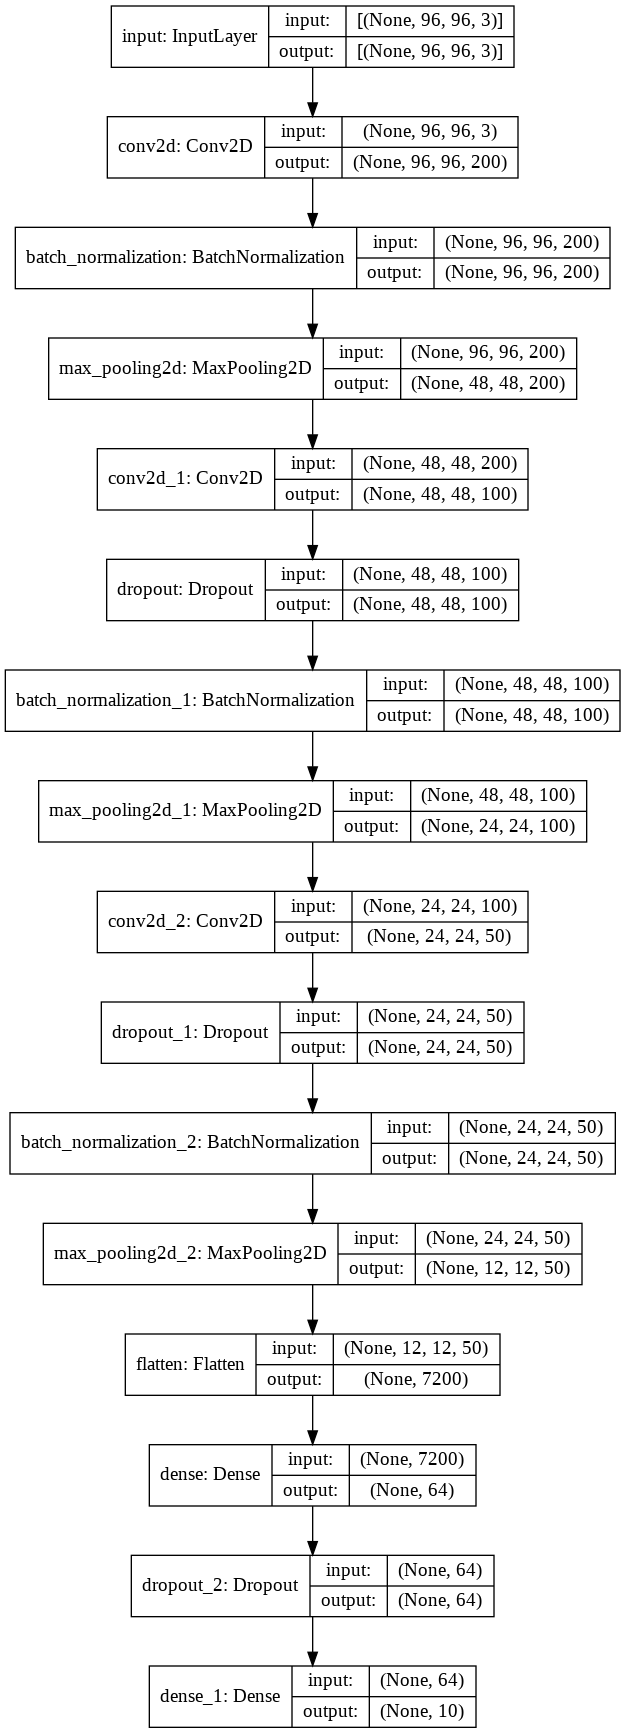

In [ ]:
plot_model(model, 'stl10-Supervised.png', show_shapes=True)

In [ ]:
opt = Adam(learning_rate=0.00004)
earlyStopping = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=opt)
mcp_save = ModelCheckpoint('mdl_wts.hdf5', save_best_only=True,monitor='val_loss', mode='min')

In [ ]:
model.summary()

Model: "stl10-Supervised"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 200)       5600      
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 200)       800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 100)       180100    
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 100)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 100)  

In [ ]:
history=model.fit(img_iter, epochs=120, verbose=1, validation_data=(x_test,y_test),batch_size=64, callbacks=[earlyStopping, mcp_save])

Epoch 1/120
79/79 [==============================] - 48s 203ms/step - loss: 2.6011 - accuracy: 0.1666 - val_loss: 2.1793 - val_accuracy: 0.2189
Epoch 2/120
79/79 [==============================] - 16s 201ms/step - loss: 2.0712 - accuracy: 0.2364 - val_loss: 1.9528 - val_accuracy: 0.3090
Epoch 3/120
79/79 [==============================] - 18s 226ms/step - loss: 1.9550 - accuracy: 0.2736 - val_loss: 1.8001 - val_accuracy: 0.3585
Epoch 4/120
79/79 [==============================] - 16s 198ms/step - loss: 1.9119 - accuracy: 0.3026 - val_loss: 1.7294 - val_accuracy: 0.3814
Epoch 5/120
79/79 [==============================] - 15s 193ms/step - loss: 1.8344 - accuracy: 0.3272 - val_loss: 1.6617 - val_accuracy: 0.4059
Epoch 6/120
79/79 [==============================] - 17s 219ms/step - loss: 1.7773 - accuracy: 0.3454 - val_loss: 1.6135 - val_accuracy: 0.4216
Epoch 7/120
79/79 [==============================] - 18s 226ms/step - loss: 1.7344 - accuracy: 0.3700 - val_loss: 1.5847 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


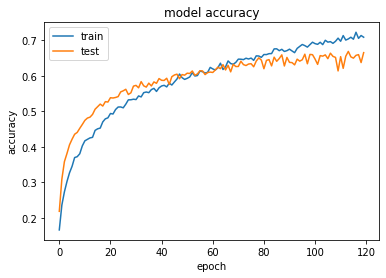

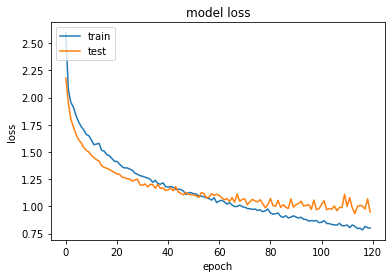

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights(filepath = 'mdl_wts.hdf5')

In [ ]:
prob = model.predict(x_unlab)
pred = np.argmax(prob, axis=1)

In [ ]:
print(pred.shape)

(100000,)


In [ ]:
for i, val in enumerate(prob):
    if (max(val)) < 0.93:
        pred[i]=-1
      

In [ ]:
idx_pred_0 = (np.where(pred==0))
idx_pred_1 = (np.where(pred==1))
idx_pred_2 = (np.where(pred==2))
idx_pred_3 = (np.where(pred==3))
idx_pred_4 = (np.where(pred==4))
idx_pred_5 = (np.where(pred==5))
idx_pred_6 = (np.where(pred==6))
idx_pred_7 = (np.where(pred==7))
idx_pred_8 = (np.where(pred==8))
idx_pred_9 = (np.where(pred==9))

In [ ]:
new_y_train = y_train.idxmax(axis=1)

In [ ]:
new_y_train.shape

(5000,)

In [ ]:
y_train_pred = new_y_train

In [ ]:
y_train_pred

0       1
1       0
2       8
3       3
4       9
       ..
4995    9
4996    8
4997    7
4998    7
4999    7
Length: 5000, dtype: int64

In [ ]:
min(y_train_pred)

0

In [ ]:
max(y_train_pred)

9

In [ ]:
y_train_pred.shape

(5000,)

In [ ]:
xt1 = np.concatenate((x_unlab[idx_pred_0[0],...],x_unlab[idx_pred_1[0],...],x_unlab[idx_pred_2[0],...],x_unlab[idx_pred_3[0],...],x_unlab[idx_pred_4[0],...],x_unlab[idx_pred_5[0],...],x_unlab[idx_pred_6[0],...],x_unlab[idx_pred_7[0],...],x_unlab[idx_pred_8[0],...],x_unlab[idx_pred_9[0],...]))
yt1 = np.concatenate((np.zeros(idx_pred_0[0].shape[0]),np.ones(idx_pred_1[0].shape[0]),np.ones(idx_pred_2[0].shape[0])*2,np.ones(idx_pred_3[0].shape[0])*3,np.ones(idx_pred_4[0].shape[0])*4,np.ones(idx_pred_5[0].shape[0])*5,np.ones(idx_pred_6[0].shape[0])*6,np.ones(idx_pred_7[0].shape[0])*7,np.ones(idx_pred_8[0].shape[0])*8,np.ones(idx_pred_9[0].shape[0])*9))

In [ ]:
xt2=np.concatenate((xt1,xt1))
yt2=np.concatenate((yt1,yt1))

In [ ]:
Xtrain=np.concatenate((xt2,x_train))
Ytrain=np.concatenate((yt2,y_train_pred))

In [ ]:
Xtrain.shape

(32850, 96, 96, 3)

In [ ]:
Ytrain.shape

(32850,)

In [ ]:
Ytrain_shaped = pd.get_dummies(Ytrain)
#one hot encoding

In [ ]:
Ytrain_shaped.shape

(32850, 10)

In [ ]:
img_iter2 = datagen.flow(Xtrain, Ytrain_shaped , batch_size=32)

In [ ]:
opt = SGD(learning_rate=0.000025)
earlyStopping = EarlyStopping(monitor='val_loss', patience=15, verbose=0, mode='min')
mcp_save = ModelCheckpoint('mdl_wtsPL.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer=opt)

In [ ]:
history2 = model.fit(img_iter2, batch_size=32, epochs=100, verbose=1, callbacks=[mcp_save,earlyStopping], validation_data=(x_test, y_test))

Epoch 1/100
1027/1027 [==============================] - 89s 86ms/step - loss: 0.4236 - accuracy: 0.8648 - val_loss: 1.0483 - val_accuracy: 0.6446
Epoch 2/100
1027/1027 [==============================] - 90s 87ms/step - loss: 0.3588 - accuracy: 0.8840 - val_loss: 1.0237 - val_accuracy: 0.6507
Epoch 3/100
1027/1027 [==============================] - 89s 86ms/step - loss: 0.3391 - accuracy: 0.8891 - val_loss: 1.0508 - val_accuracy: 0.6459
Epoch 4/100
1027/1027 [==============================] - 89s 87ms/step - loss: 0.3286 - accuracy: 0.8930 - val_loss: 1.0301 - val_accuracy: 0.6509
Epoch 5/100
1027/1027 [==============================] - 90s 88ms/step - loss: 0.3211 - accuracy: 0.8966 - val_loss: 1.0733 - val_accuracy: 0.6371
Epoch 6/100
1027/1027 [==============================] - 89s 86ms/step - loss: 0.3156 - accuracy: 0.8965 - val_loss: 1.0487 - val_accuracy: 0.6447
Epoch 7/100
1027/1027 [==============================] - 87s 85ms/step - loss: 0.3100 - accuracy: 0.8981 - val_loss: 1

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


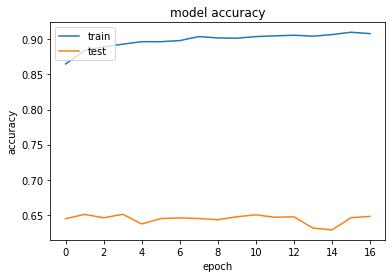

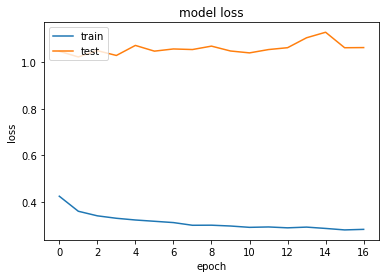

In [ ]:
print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights(filepath = 'mdl_wtsPL.hdf5')
scoretr = model.evaluate(x_train, y_train, verbose=0)
print('Train PL CV score:', scoretr[0])
print('Train PL CV accuracy:', scoretr[1])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train PL CV score: 0.6724172234535217
Train PL CV accuracy: 0.7545999884605408
Test score: 1.0236568450927734
Test accuracy: 0.6507499814033508
